Import

In [41]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

Read

In [42]:
#based on this article:-
# https://machinelearningmastery.com/persistence-time-series-forecasting-with-python/
series = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Misc-Predictions/main/Anon%20Training%20Deficiency%20-%20Anon%20Training%20Deficiency%20(1).csv')
series['ID'] = series.index
series = series[['ID', 'Month Year', 'Training Deficiency']]
series

,ID,Month Year,Training Deficiency
0,0,Jun-16,111
1,1,Jul-16,124
2,2,Aug-16,133
3,3,Sep-16,139
4,4,Oct-16,131
...,...,...,...
58,58,Apr-21,186
59,59,May-21,209
60,60,Jun-21,172
61,61,Jul-21,170


Process

In [43]:
series.index = series['Month Year']
series.drop(['ID', 'Month Year'], axis=1, inplace=True)
series

,Training Deficiency
Month Year,
Jun-16,111
Jul-16,124
Aug-16,133
Sep-16,139
Oct-16,131
...,...
Apr-21,186
May-21,209
Jun-21,172


In [44]:
# Create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe)

      t-1  t+1
0     NaN  111
1   111.0  124
2   124.0  133
3   133.0  139
4   139.0  131
..    ...  ...
58  212.0  186
59  186.0  209
60  209.0  172
61  172.0  170
62  170.0  169

[63 rows x 2 columns]


In [45]:
dataframe.isnull().sum()

t-1    1
t+1    0
dtype: int64

In [46]:
dataframe = dataframe.fillna(0)
dataframe.reset_index(drop=True, inplace=True)
dataframe

,t-1,t+1
0,0.0,111
1,111.0,124
2,124.0,133
3,133.0,139
4,139.0,131
...,...,...
58,212.0,186
59,186.0,209
60,209.0,172
61,172.0,170


In [47]:
# split into train and test sets
dataframe = dataframe.astype(int)

X = dataframe['t-1']
y = dataframe['t+1']

X.shape, y.shape

((63,), (63,))

In [48]:
length = len(X) * 0.7

X_train = X.loc[: length]
y_train = y.loc[: length]

X_val = X.loc[length :]
y_val = y.loc[length :]

X_train.shape, y_train.shape, y_train.shape, y_val.shape

((45,), (45,), (45,), (18,))

In [49]:
# persistence model
def model_persistence(x):
	return x

In [50]:
# walk-forward validation
predictions = list()
for x in X_val:
	yhat = model_persistence(x)
	predictions.append(yhat)

In [51]:
MSE = np.square(np.subtract(y_val,predictions)).mean() 
print("MSE", MSE)
 
RMSE = math.sqrt(MSE)
print("RMSE", RMSE)


MSE 351.05555555555554
RMSE 18.73647660462221


In [52]:
predictions

[160,
 171,
 169,
 177,
 219,
 200,
 202,
 192,
 198,
 224,
 228,
 227,
 235,
 212,
 186,
 209,
 172,
 170]

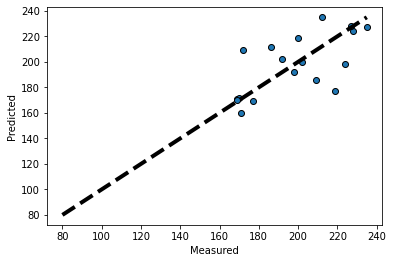

In [53]:
fig, ax = plt.subplots()
ax.scatter(y_val, predictions, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

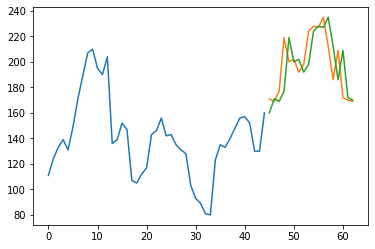

In [54]:
# plot predictions and expected results
plt.plot(y_train)
plt.plot([None for i in y_train] + [x for x in y_val])
plt.plot([None for i in y_train] + [x for x in predictions])
plt.show()

In [55]:
df=pd.DataFrame({'Actual Values': y_val,'Training Deficiency': predictions}).sort_index()
df

,Actual Values,Training Deficiency
45,171,160
46,169,171
47,177,169
48,219,177
49,200,219
50,202,200
51,192,202
52,198,192
53,224,198
54,228,224
